In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')

In [34]:
# Display the first few rows of the dataset to understand its structure
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,2
4,15804002,Male,19,76000,0,2


In [35]:
# Check for missing values
df.isna().sum()

# If there are missing values, handle them (e.g., by imputing the mean or median)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Cluster            0
dtype: int64

In [27]:
# Select the feature for clustering (e.g., 'EstimatedSalary')
X = df[['EstimatedSalary']]

In [28]:
# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

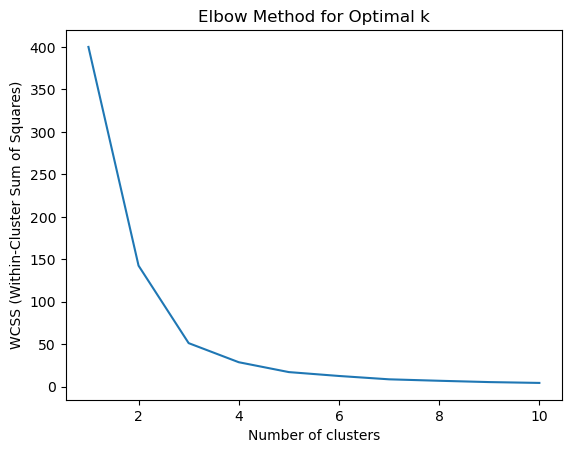

In [30]:

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [31]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # Adjust as needed

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Aniket Hend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [32]:
# Display the resulting clusters
print(df[['EstimatedSalary', 'Cluster']].head())

   EstimatedSalary  Cluster
0            19000        0
1            20000        0
2            43000        0
3            57000        2
4            76000        2


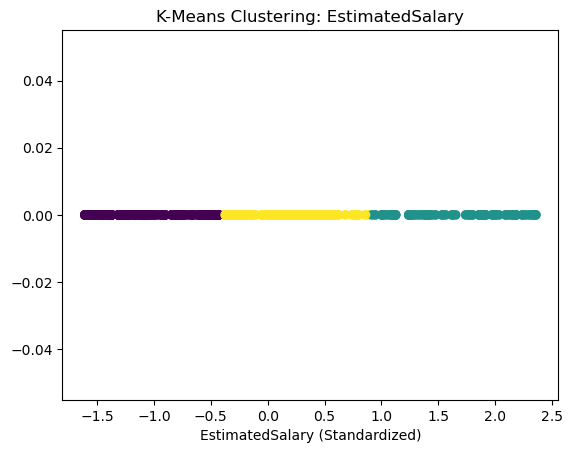

In [33]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], np.zeros_like(X_scaled), c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering: EstimatedSalary')
plt.xlabel('EstimatedSalary (Standardized)')
plt.show()